<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session8/FinalS8Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session8/Template'
sys.path.append(folder)


In [3]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate

In [4]:
classes, trainloader, testloader = train_test_loader.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


shape: torch.Size([128, 3, 32, 32])


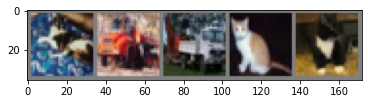

In [5]:
show_images.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [7]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

In [8]:
testLoss = []
testAcc = []
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
    train_test.train(model, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    testLoss.append(test_loss)
    testAcc.append(test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.8069202899932861 Batch_id=390 Accuracy=25.42: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 3231/10000 (32.31%)

EPOCH: 2 LR: 0.1


Loss=1.64254629611969 Batch_id=390 Accuracy=41.79: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 4709/10000 (47.09%)

EPOCH: 3 LR: 0.1


Loss=1.1434603929519653 Batch_id=390 Accuracy=51.11: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5375/10000 (53.75%)

EPOCH: 4 LR: 0.1


Loss=1.1219093799591064 Batch_id=390 Accuracy=59.24: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6081/10000 (60.81%)

EPOCH: 5 LR: 0.1


Loss=0.7872081398963928 Batch_id=390 Accuracy=65.14: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6734/10000 (67.34%)

EPOCH: 6 LR: 0.1


Loss=0.8730744123458862 Batch_id=390 Accuracy=69.02: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6761/10000 (67.61%)

EPOCH: 7 LR: 0.1


Loss=0.8366363644599915 Batch_id=390 Accuracy=72.45: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7090/10000 (70.90%)

EPOCH: 8 LR: 0.1


Loss=0.9096876978874207 Batch_id=390 Accuracy=74.94: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7269/10000 (72.69%)

EPOCH: 9 LR: 0.1


Loss=0.6275104284286499 Batch_id=390 Accuracy=77.06: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7241/10000 (72.41%)

EPOCH: 10 LR: 0.1


Loss=0.8044511079788208 Batch_id=390 Accuracy=78.09: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7360/10000 (73.60%)

EPOCH: 11 LR: 0.1


Loss=0.5285114645957947 Batch_id=390 Accuracy=79.28: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7677/10000 (76.77%)

EPOCH: 12 LR: 0.1


Loss=0.4989323019981384 Batch_id=390 Accuracy=80.28: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7480/10000 (74.80%)

EPOCH: 13 LR: 0.1


Loss=0.6359146237373352 Batch_id=390 Accuracy=80.76: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7933/10000 (79.33%)

EPOCH: 14 LR: 0.1


Loss=0.5630360245704651 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7526/10000 (75.26%)

EPOCH: 15 LR: 0.1


Loss=0.4314505457878113 Batch_id=390 Accuracy=81.76: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7617/10000 (76.17%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.2282218486070633 Batch_id=390 Accuracy=87.54: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8528/10000 (85.28%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.18549004197120667 Batch_id=390 Accuracy=89.43: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8615/10000 (86.15%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.29452675580978394 Batch_id=390 Accuracy=90.38: 100%|██████████| 391/391 [00:31<00:00, 12.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8677/10000 (86.77%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.2794044613838196 Batch_id=390 Accuracy=90.94: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8663/10000 (86.63%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.2029862105846405 Batch_id=390 Accuracy=91.36: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8685/10000 (86.85%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.19225038588047028 Batch_id=390 Accuracy=92.01: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8648/10000 (86.48%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.15903189778327942 Batch_id=390 Accuracy=92.26: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8658/10000 (86.58%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.2739812731742859 Batch_id=390 Accuracy=92.72: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8705/10000 (87.05%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.245743066072464 Batch_id=390 Accuracy=93.28: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8699/10000 (86.99%)

EPOCH: 25 LR: 0.010000000000000002


Loss=0.09755861759185791 Batch_id=390 Accuracy=93.46: 100%|██████████| 391/391 [00:31<00:00, 12.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8683/10000 (86.83%)

EPOCH: 26 LR: 0.010000000000000002


Loss=0.1048358678817749 Batch_id=390 Accuracy=93.77: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8723/10000 (87.23%)

EPOCH: 27 LR: 0.010000000000000002


Loss=0.1754828542470932 Batch_id=390 Accuracy=93.97: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8687/10000 (86.87%)

EPOCH: 28 LR: 0.010000000000000002


Loss=0.1672917753458023 Batch_id=390 Accuracy=94.45: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8692/10000 (86.92%)

EPOCH: 29 LR: 0.010000000000000002


Loss=0.2296721488237381 Batch_id=390 Accuracy=94.45: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8701/10000 (87.01%)

EPOCH: 30 LR: 0.010000000000000002


Loss=0.2986065745353699 Batch_id=390 Accuracy=94.68: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8670/10000 (86.70%)

EPOCH: 31 LR: 0.0010000000000000002


Loss=0.13938798010349274 Batch_id=390 Accuracy=96.16: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8791/10000 (87.91%)

EPOCH: 32 LR: 0.0010000000000000002


Loss=0.05768093466758728 Batch_id=390 Accuracy=96.64: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8802/10000 (88.02%)

EPOCH: 33 LR: 0.0010000000000000002


Loss=0.11257725954055786 Batch_id=390 Accuracy=97.06: 100%|██████████| 391/391 [00:31<00:00, 12.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8815/10000 (88.15%)

EPOCH: 34 LR: 0.0010000000000000002


Loss=0.12199223041534424 Batch_id=390 Accuracy=97.12: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8798/10000 (87.98%)

EPOCH: 35 LR: 0.0010000000000000002


Loss=0.09631715714931488 Batch_id=390 Accuracy=97.16: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8850/10000 (88.50%)

EPOCH: 36 LR: 0.0010000000000000002


Loss=0.13745447993278503 Batch_id=390 Accuracy=97.29: 100%|██████████| 391/391 [00:31<00:00, 12.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8814/10000 (88.14%)

EPOCH: 37 LR: 0.0010000000000000002


Loss=0.0877072662115097 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8851/10000 (88.51%)

EPOCH: 38 LR: 0.0010000000000000002


Loss=0.11486011743545532 Batch_id=390 Accuracy=97.51: 100%|██████████| 391/391 [00:32<00:00, 12.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8871/10000 (88.71%)

EPOCH: 39 LR: 0.0010000000000000002


Loss=0.05925304442644119 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8836/10000 (88.36%)

EPOCH: 40 LR: 0.0010000000000000002


Loss=0.12969282269477844 Batch_id=390 Accuracy=97.71: 100%|██████████| 391/391 [00:32<00:00, 12.13it/s]



Test set: Average loss: 0.0031, Accuracy: 8809/10000 (88.09%)



GroundTruth:    car  bird  frog  deer  bird
Predicted:    car  bird   cat  deer  bird


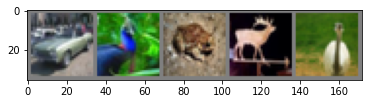

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 88 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 82 %
Accuracy of   cat : 69 %
Accuracy of  deer : 92 %
Accuracy of   dog : 78 %
Accuracy of  frog : 92 %
Accuracy of horse : 96 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %


Text(0.5, 1.0, 'Test Accuracy')

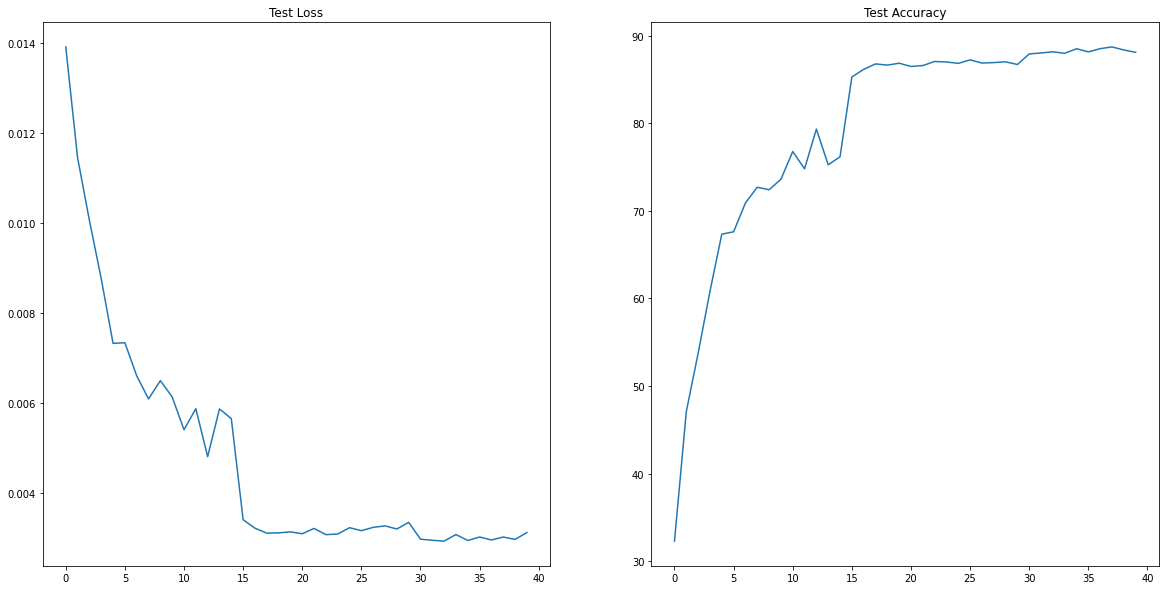

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(testLoss)
axs[0].set_title("Test Loss")


axs[1].plot(testAcc[39])
axs[1].set_title("Test Accuracy")

